In [89]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [90]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [135]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 12,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

In [136]:
validation_all = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/validation.pkl")
test_all = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/test.pkl")
validation_truths = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/truths_validation.pkl")
test_truths = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/truths_test.pkl")

In [137]:
test_all.index = range(len(test_all))
validation_truths.index = range(len(validation_truths))
test_truths.index = range(len(test_truths))

In [138]:
validation_all = validation_all.loc[:len(validation_truths)-1, :]
test_all = test_all.loc[:len(test_truths)-1, :]

In [139]:
colName = {str(i):i for i in range (0, 12)}
validation_all = validation_all.rename(columns=colName)
test_all = test_all.rename(columns=colName)

In [140]:
test_truths.loc[:, [0, 1, 2, 3]] = test_all.loc[:, [0, 1, 2, 3]]
validation_truths.loc[:, [0, 1, 2, 3]] = validation_all.loc[:, [0, 1, 2, 3]]

In [141]:
def getProton(df, phase=1, gen = True):
    df.loc[:, "Pp"] = mag([df.loc[:,5], df.loc[:,6], df.loc[:,7]])
    df.loc[:, "Ptheta"] = getTheta([df.loc[:,5], df.loc[:,6], df.loc[:,7]])
    df.loc[:, "Pphi"] = getPhi([df.loc[:,5], df.loc[:,6], df.loc[:,7]])
    df.loc[:, "Ppx"] = df.loc[:,5]
    df.loc[:, "Ppy"] = df.loc[:,6]
    df.loc[:, "Ppz"] = df.loc[:,7]
    df.loc[:, "Pe"] = np.sqrt(df.loc[:, "Pp"]**2 + M**2)
    
    if gen:
        df.loc[:, "GenPp"] = mag([df.loc[:,"z5"], df.loc[:,"z6"], df.loc[:,"z7"]])
        df.loc[:, "GenPtheta"] = getTheta([df.loc[:,"z5"], df.loc[:,"z6"], df.loc[:,"z7"]])
        df.loc[:, "GenPphi"] = getPhi([df.loc[:,"z5"], df.loc[:,"z6"], df.loc[:,"z7"]])
        df.loc[:, "GenPpx"] = df.loc[:,"z5"]
        df.loc[:, "GenPpy"] = df.loc[:,"z6"]
        df.loc[:, "GenPpz"] = df.loc[:,"z7"]
        df.loc[:, "GenPe"] = df.loc[:,"z4"]    
    return df

def getElectron(df, phase=1, gen = True):
    df.loc[:, "Ep"] = mag([df.loc[:,1], df.loc[:,2], df.loc[:,3]])
    df.loc[:, "Etheta"] = getTheta([df.loc[:,1], df.loc[:,2], df.loc[:,3]])
    df.loc[:, "Ephi"] = getPhi([df.loc[:,1], df.loc[:,2], df.loc[:,3]])
    df.loc[:, "Epx"] = df.loc[:,1]
    df.loc[:, "Epy"] = df.loc[:, 2]
    df.loc[:, "Epz"] = df.loc[:,3]
    df.loc[:, "Ee"] = np.sqrt(df.loc[:, "Ep"]**2 + me**2)

    if gen:
        df.loc[:, "GenEp"] = mag([df.loc[:,"z1"], df.loc[:,"z2"], df.loc[:,"z3"]])
        df.loc[:, "GenEtheta"] = getTheta([df.loc[:,"z1"], df.loc[:,"z2"], df.loc[:,"z3"]])
        df.loc[:, "GenEphi"] = getPhi([df.loc[:,"z1"], df.loc[:,"z2"], df.loc[:,"z3"]])
        df.loc[:, "GenEpx"] = df.loc[:,"z1"]
        df.loc[:, "GenEpy"] = df.loc[:,"z2"]
        df.loc[:, "GenEpz"] = df.loc[:,"z3"]
        df.loc[:, "GenEe"] = df.loc[:,"z0"]    
    return df

def getPhoton(df, phase=1, gen = True):
    df.loc[:, "Gp"] = mag([df.loc[:,9], df.loc[:,10], df.loc[:,11]])
    df.loc[:, "Gtheta"] = getTheta([df.loc[:,9], df.loc[:,10], df.loc[:,11]])
    df.loc[:, "Gphi"] = getPhi([df.loc[:,9], df.loc[:,10], df.loc[:,11]])
    df.loc[:, "Gpx"] = df.loc[:,9]
    df.loc[:, "Gpy"] = df.loc[:, 10]
    df.loc[:, "Gpz"] = df.loc[:,11]
    df.loc[:, "Ge"] = df.loc[:,"Gp"]

    if gen:
        df.loc[:, "GenGp"] = mag([df.loc[:,"z9"], df.loc[:,"z10"], df.loc[:,"z11"]])
        df.loc[:, "GenGtheta"] = getTheta([df.loc[:,"z9"], df.loc[:,"z10"], df.loc[:,"z11"]])
        df.loc[:, "GenGphi"] = getPhi([df.loc[:,"z9"], df.loc[:,"z10"], df.loc[:,"z11"]])
        df.loc[:, "GenGpx"] = df.loc[:,"z9"]
        df.loc[:, "GenGpy"] = df.loc[:, "z10"]
        df.loc[:, "GenGpz"] = df.loc[:,"z11"]
        df.loc[:, "GenGe"] = df.loc[:,"z8"]
    return df

def getParticle(df, phase=1, gen = True):
    df = getProton(df, phase, gen)
    df = getElectron(df, phase, gen)
    df = getPhoton(df, phase, gen)
    return df

In [142]:
test_truths = getParticle(test_truths, gen = False)
test_all = getParticle(test_all, gen = False)
validation_truths = getParticle(validation_truths, gen = False)
validation_all = getParticle(validation_all, gen = True)

In [143]:
def saveGenDVCSvars(df):
        #set up dvcs variables
        ele = [df['GenEpx'], df['GenEpy'], df['GenEpz']]
        df.loc[:, 'GenEp'] = mag(ele)
        df.loc[:, 'GenEe'] = getEnergy(ele, me)
        df.loc[:, 'GenEtheta'] = getTheta(ele)
        df.loc[:, 'GenEphi'] = getPhi(ele)

        pro = [df['GenPpx'], df['GenPpy'], df['GenPpz']]

        gam = [df['GenGpx'], df['GenGpy'], df['GenGpz']]
        df.loc[:, 'GenGp'] = mag(gam)
        df.loc[:, 'GenGe'] = getEnergy(gam, 0)
        df.loc[:, 'GenGtheta'] = getTheta(gam)
        df.loc[:, 'GenGphi'] = getPhi(gam)

        Ppt = mag([df['GenPpx'], df['GenPpy'], 0])

        VGS = [-df['GenEpx'], -df['GenEpy'], pbeam - df['GenEpz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["GenEpx"] - df["GenPpx"], -df["GenEpy"] - df["GenPpy"],
                  pbeam - df["GenEpz"] - df["GenPpz"]]
        VmissP = [-(df["GenEpx"] + df["GenGpx"]), -(df["GenEpy"] + df["GenGpy"]),
                  -(-pbeam + df["GenEpz"] + df["GenGpz"])]
        Vmiss = [-(df["GenEpx"] + df["GenPpx"] + df["GenGpx"]), -(df["GenEpy"] + df["GenPpy"] + df["GenGpy"]),
                 -(-pbeam + df["GenEpz"] + df["GenPpz"] + df["GenGpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'GenMpx'], df.loc[:, 'GenMpy'], df.loc[:, 'GenMpz'] = Vmiss

        # binning kinematics
        df.loc[:,'GenQ2'] = -((ebeam - df['GenEe'])**2 - mag2(VGS))
        df.loc[:,'Gennu'] = (ebeam - df['GenEe'])
        df.loc[:,'Geny'] = df['Gennu']/ebeam
        df.loc[:,'GenxB'] = df['GenQ2'] / 2.0 / M / df['Gennu']
        df.loc[:,'Gent1'] = 2 * M * (df['GenPe'] - M)
        df.loc[:,'Gent2'] = (M * df['GenQ2'] + 2 * M * df['Gennu'] * (df['Gennu'] - np.sqrt(df['Gennu'] * df['Gennu'] + df['GenQ2']) * costheta))\
        / (M + df['Gennu'] - np.sqrt(df['Gennu'] * df['Gennu'] + df['GenQ2']) * costheta)
        df.loc[:,'GenW'] = np.sqrt(np.maximum(0, (ebeam + M - df['GenEe'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'Genphi1'] = angle(v3l, v3h)
        df.loc[:,'Genphi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['Genphi1'], df['Genphi1'])
        df.loc[:,'Genphi2'] = angle(v3l, v3g)
        df.loc[:,'Genphi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['Genphi2'], df['Genphi2'])

        # exclusivity variables
        df.loc[:,'GenMM2_epg'] = (-M - ebeam + df["GenEe"] +
                             df["GenPe"] + df["GenGe"])**2 - mag2(Vmiss)
        df.loc[:,'GenME_epg'] = (M + ebeam - df["GenEe"] - df["GenPe"] - df["GenGe"])
        df.loc[:,'GenMM2_ep'] = (-M - ebeam + df["GenEe"] + df["GenPe"])**2 - mag2(VmissG)
        df.loc[:,'GenMM2_eg'] = (-M - ebeam + df["GenEe"] + df["GenGe"])**2 - mag2(VmissP)
        df.loc[:,'GenMPt'] = np.sqrt((df["GenEpx"] + df["GenPpx"] + df["GenGpx"])**2 +
                                (df["GenEpy"] + df["GenPpy"] + df["GenGpy"])**2)
        df.loc[:,'GenconeAngle'] = angle(ele, gam)
        df.loc[:,'GenreconGam'] = angle(gam, VmissG)
        df.loc[:,'Gencoplanarity'] = angle(v3h, v3g)
        return df

In [144]:
def saveDVCSvars(df):
        #set up dvcs variables
        ele = [df['Epx'], df['Epy'], df['Epz']]
        df.loc[:, 'Ep'] = mag(ele)
        df.loc[:, 'Ee'] = getEnergy(ele, me)
        df.loc[:, 'Etheta'] = getTheta(ele)
        df.loc[:, 'Ephi'] = getPhi(ele)

        pro = [df['Ppx'], df['Ppy'], df['Ppz']]

        gam = [df['Gpx'], df['Gpy'], df['Gpz']]
        df.loc[:, 'Gp'] = mag(gam)
        df.loc[:, 'Ge'] = getEnergy(gam, 0)
        df.loc[:, 'Gtheta'] = getTheta(gam)
        df.loc[:, 'Gphi'] = getPhi(gam)

        Ppt = mag([df['Ppx'], df['Ppy'], 0])

        VGS = [-df['Epx'], -df['Epy'], pbeam - df['Epz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["Epx"] - df["Ppx"], -df["Epy"] - df["Ppy"],
                  pbeam - df["Epz"] - df["Ppz"]]
        VmissP = [-(df["Epx"] + df["Gpx"]), -(df["Epy"] + df["Gpy"]),
                  -(-pbeam + df["Epz"] + df["Gpz"])]
        Vmiss = [-(df["Epx"] + df["Ppx"] + df["Gpx"]), -(df["Epy"] + df["Ppy"] + df["Gpy"]),
                 -(-pbeam + df["Epz"] + df["Ppz"] + df["Gpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'Mpx'], df.loc[:, 'Mpy'], df.loc[:, 'Mpz'] = Vmiss

        # binning kinematics
        df.loc[:,'Q2'] = -((ebeam - df['Ee'])**2 - mag2(VGS))
        df.loc[:,'nu'] = (ebeam - df['Ee'])
        df.loc[:,'y'] = df['nu']/ebeam
        df.loc[:,'xB'] = df['Q2'] / 2.0 / M / df['nu']
        df.loc[:,'t1'] = 2 * M * (df['Pe'] - M)
        df.loc[:,'t2'] = (M * df['Q2'] + 2 * M * df['nu'] * (df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta))\
        / (M + df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta)
        df.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df['Ee'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'phi1'] = angle(v3l, v3h)
        df.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['phi1'], df['phi1'])
        df.loc[:,'phi2'] = angle(v3l, v3g)
        df.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['phi2'], df['phi2'])

        # exclusivity variables
        df.loc[:,'MM2_epg'] = (-M - ebeam + df["Ee"] +
                             df["Pe"] + df["Ge"])**2 - mag2(Vmiss)
        df.loc[:,'ME_epg'] = (M + ebeam - df["Ee"] - df["Pe"] - df["Ge"])
        df.loc[:,'MM2_ep'] = (-M - ebeam + df["Ee"] + df["Pe"])**2 - mag2(VmissG)
        df.loc[:,'MM2_eg'] = (-M - ebeam + df["Ee"] + df["Ge"])**2 - mag2(VmissP)
        df.loc[:,'MPt'] = np.sqrt((df["Epx"] + df["Ppx"] + df["Gpx"])**2 +
                                (df["Epy"] + df["Ppy"] + df["Gpy"])**2)
        df.loc[:,'coneAngle'] = angle(ele, gam)
        df.loc[:,'reconGam'] = angle(gam, VmissG)
        df.loc[:,'coplanarity'] = angle(v3h, v3g)
        return df

In [145]:
validation_all = saveGenDVCSvars(validation_all)

In [146]:
test_truths = saveDVCSvars(test_truths)
test_all = saveDVCSvars(test_all)
validation_truths = saveDVCSvars(validation_truths)
validation_all = saveDVCSvars(validation_all)
validation_all = saveGenDVCSvars(validation_all)

<AxesSubplot:>

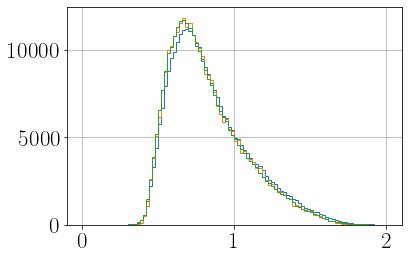

In [169]:
validation_all.Pp.hist(bins = np.linspace(0, 2, 101), histtype = 'step')
validation_all.GenPp.hist(bins = np.linspace(0, 2, 101), histtype = 'step')
validation_truths.Pp.hist(bins = np.linspace(0, 2, 101), histtype = 'step')


<AxesSubplot:>

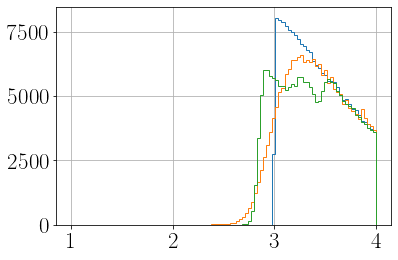

In [170]:
validation_all.Gp.hist(bins = np.linspace(1, 4, 101), histtype = 'step')
validation_all.GenGp.hist(bins = np.linspace(1, 4, 101), histtype = 'step')
validation_truths.Gp.hist(bins = np.linspace(1, 4, 101), histtype = 'step')


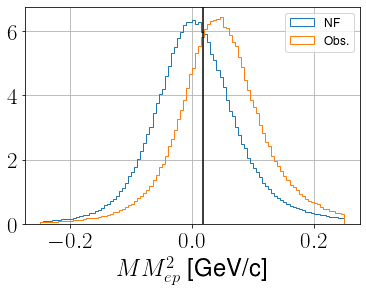

In [147]:
# test_truths.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True)
# test_all.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True)

# validation_truths.MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step')
# validation_all.MM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step')

validation_truths.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step', label = 'NF')
validation_all.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step', label = 'Obs.')
# validation_all.GenMM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step', label = 'True.')
plt.legend(loc = 'upper right')
# validation_all.GenMM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step')
plt.axvline(0.135**2, color = 'k')
plt.xlabel(r"$MM^2_{ep}$"+" ["+GeVc+"]")
plt.show()

In [162]:
validation_truths.MM2_ep.mean()

0.008064198721707206

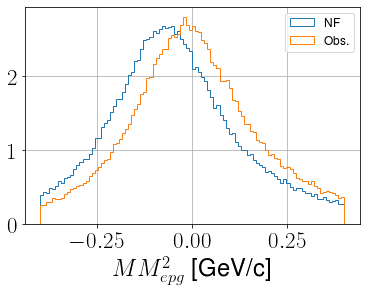

In [153]:
test_truths.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True, histtype = 'step', label = "NF")
test_all.MM2_ep.hist(bins = np.linspace(-0.4, 0.4, 101), density = True, histtype = 'step', label = "Obs.")

# test_truths.MM2_epg.hist(bins = np.linspace(-0.025, 0.025, 101), density = True, histtype = 'step', label = "NF")
# test_all.MM2_epg.hist(bins = np.linspace(-0.025, 0.025, 101), density = True, histtype = 'step', label = "Obs.")

# validation_truths.MM2_epg.hist(bins = np.linspace(-0.025, 0.025, 101), density = True, histtype = 'step', label = "NF")
# validation_all.MM2_epg.hist(bins = np.linspace(-0.025, 0.025, 101), density = True, histtype = 'step', label = 'Obs.')

# validation_truths.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step', label = 'NF')
# validation_all.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step', label = 'Obs.')
plt.legend(loc = 'upper right')
# validation_all.GenMM2_epg.hist(bins = np.linspace(-0.04, 0.04, 101), density = True, histtype = 'step')
# plt.axvline(0.135**2, color = 'k')
plt.xlabel(r"$MM^2_{epg}$"+" ["+GeVc+"]")
plt.show()

<AxesSubplot:>

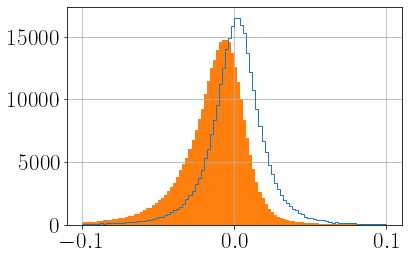

In [149]:
(validation_all.GenPe - validation_truths.Pe).hist(bins = np.linspace(-0.1, 0.1 ,101), histtype = 'step')
(validation_all.GenPe - validation_all.Pe).hist(bins = np.linspace(-0.1, 0.1 ,101))

In [158]:
(validation_all.GenGe - validation_all.Ge).mean()

-0.021893468777932273

<AxesSubplot:>

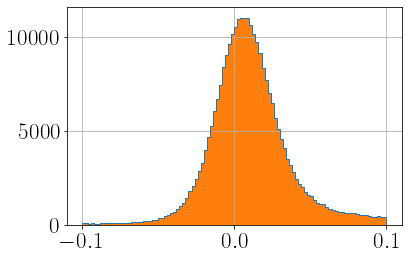

In [150]:
(validation_all.GenEe - validation_truths.Ee).hist(bins = np.linspace(-0.1, 0.1 ,101), histtype = 'step')
(validation_all.GenEe - validation_all.Ee).hist(bins = np.linspace(-0.1, 0.1,101))

<AxesSubplot:>

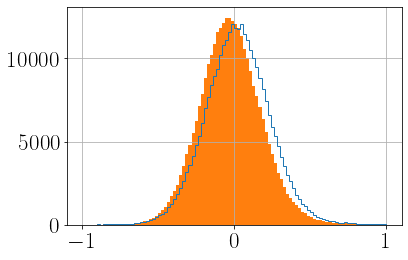

In [151]:
(validation_all.GenGe - validation_truths.Ge).hist(bins = np.linspace(-1, 1 ,101), histtype = 'step')
(validation_all.GenGe - validation_all.Ge).hist(bins = np.linspace(-1, 1,101))

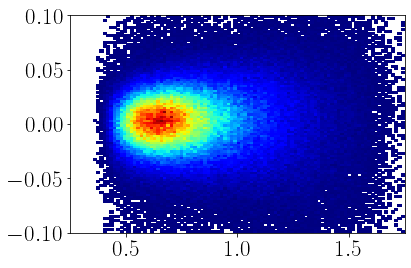

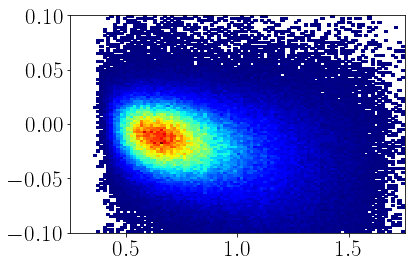

In [152]:
plt.hist2d(validation_all.GenPp, validation_all.GenPp - validation_truths.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1 )
plt.show()
plt.hist2d(validation_all.GenPp, validation_all.GenPp - validation_all.Pp, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1 )
plt.show()

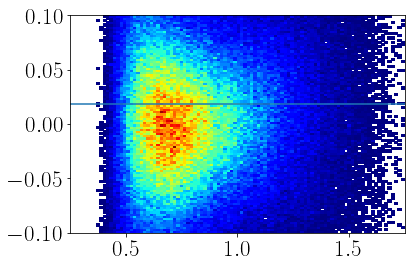

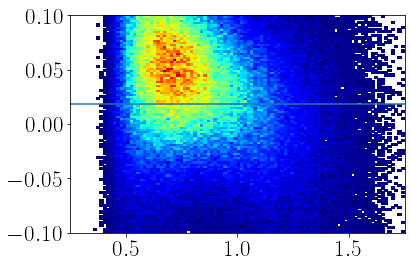

In [164]:
plt.hist2d(validation_all.GenPp, validation_truths.MM2_ep, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1 )
plt.axhline(0.135**2)
plt.show()
plt.hist2d(validation_all.GenPp, validation_all.MM2_ep, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin = 1 )
plt.axhline(0.135**2)
plt.show()

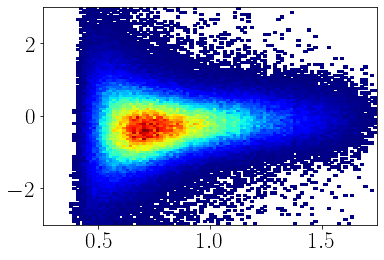

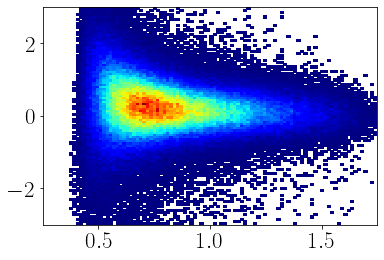

In [33]:
plt.hist2d(validation_all.GenPp, validation_all.GenPtheta - validation_truths.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-3, 3, 101)], cmap = cmap, cmin = 1 )
plt.show()
plt.hist2d(validation_all.GenPp, validation_all.GenPtheta - validation_all.Ptheta, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-3, 3, 101)], cmap = cmap, cmin = 1 )
plt.show()

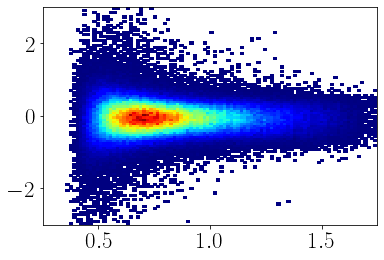

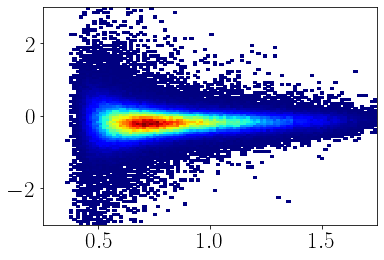

In [62]:
plt.hist2d(validation_all.GenPp, validation_all.GenPphi - validation_truths.Pphi, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-3, 3, 101)], cmap = cmap, cmin = 1 )
plt.show()
plt.hist2d(validation_all.GenPp, validation_all.GenPphi - validation_all.Pphi, bins = [np.linspace(0.25, 1.75, 101), np.linspace(-3, 3, 101)], cmap = cmap, cmin = 1 )
plt.show()

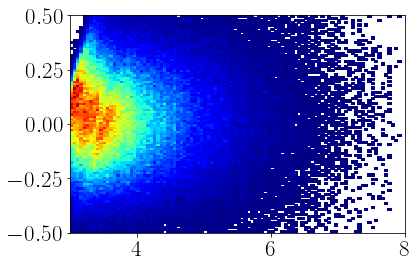

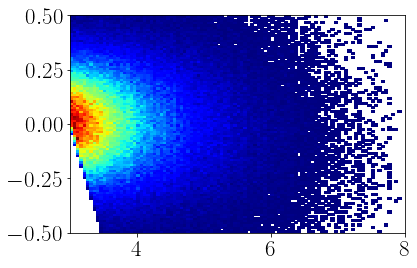

In [99]:
plt.hist2d(validation_all.GenGp, validation_all.GenGp - validation_truths.Gp, bins = [np.linspace(3, 8, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1 )
plt.show()
plt.hist2d(validation_all.GenGp, validation_all.Gp - validation_all.GenGp, bins = [np.linspace(3, 8, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1 )
plt.show()

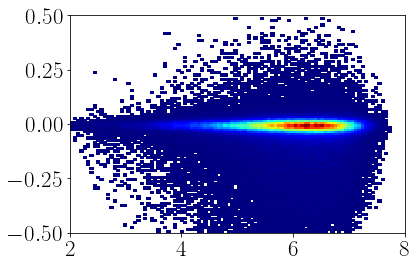

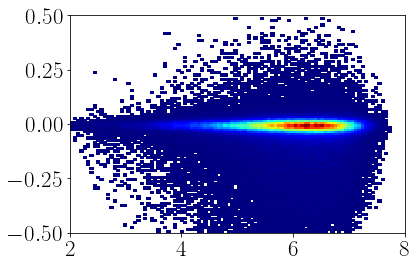

In [123]:
plt.hist2d(validation_all.GenEp, validation_truths.Ep - validation_all.GenEp, bins = [np.linspace(2, 8, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1 )
plt.show()
plt.hist2d(validation_all.GenEp, validation_all.Ep - validation_all.GenEp, bins = [np.linspace(2, 8, 101), np.linspace(-0.5, 0.5, 101)], cmap = cmap, cmin = 1 )
plt.show()


In [49]:
# phase2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/ca rtesian/phase2.pkl")
phase1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/cartesian/phase1.pkl")
# phase0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/train.pkl")

In [57]:
phase0 = phase0.rename(columns=colName)
phase0.index = range(len(phase0))
phase1.index = range(len(phase1))
phase0 = phase0.loc[:len(phase1)-1, :]
# phase1.loc[:, [0, 1, 2, 3, 8, 9, 10, 11]] = phase0.loc[:, [0, 1, 2, 3, 8, 9, 10, 11]]

In [59]:
phase2 = getParticle(phase2)
phase1 = getParticle(phase1)
phase0 = getParticle(phase0)

In [60]:
phase2 = saveDVCSvars(phase2)
phase1 = saveDVCSvars(phase1)
phase0 = saveDVCSvars(phase0)

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

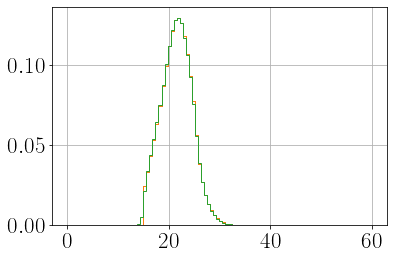

In [45]:
phase0.coneAngle.hist(bins = np.linspace(0, 60, 101), density=True, histtype = 'step')
phase1.coneAngle.hist(bins = np.linspace(0, 60, 101), density=True, histtype = 'step')
phase2.coneAngle.hist(bins = np.linspace(0, 60, 101), density=True, histtype = 'step')

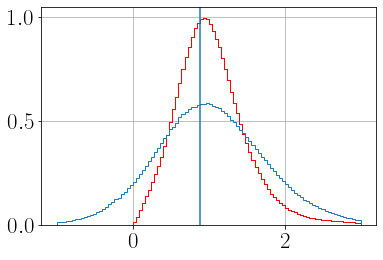

In [46]:
phase0.MM2_eg.hist(bins = np.linspace(-1, 3, 101), density=True, histtype = 'step', color='k')
phase1.MM2_eg.hist(bins = np.linspace(-1, 3, 101), density=True, histtype = 'step', color='r')
phase2.MM2_eg.hist(bins = np.linspace(-1, 3, 101), density=True, histtype = 'step')
plt.axvline(0.938272**2)

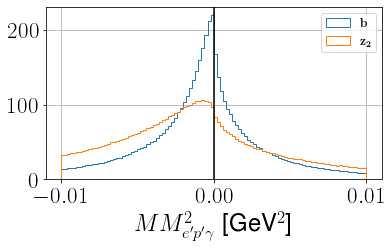

In [61]:
phase0.MM2_epg.hist(bins = np.linspace(-0.01, 0.01, 101), density=True, histtype = 'step', label=r"$\mathbf{b}$")
phase1.MM2_epg.hist(bins = np.linspace(-0.01, 0.01, 101), density=True, histtype = 'step', label=r"$\mathbf{z_2}$")
# phase2.MM2_epg.hist(bins = np.linspace(-0.01, 0.01, 101), density=True, histtype = 'step', label=r"NF on NF")
plt.legend(loc = "upper right")
plt.xlabel(r"$MM^2_{e'p'\gamma}$" + " ["+GeV2+"]")
plt.axvline(0, color ='k')
plt.tight_layout()
plt.savefig("MM2_epg.pdf")

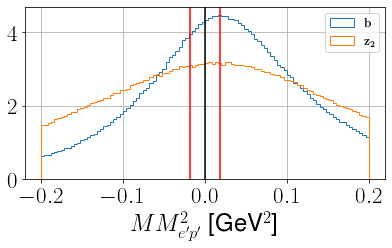

In [62]:
phase0.MM2_ep.hist(bins = np.linspace(-0.2, 0.2, 101), density=True, histtype = 'step', label=r"$\mathbf{b}$")
phase1.MM2_ep.hist(bins = np.linspace(-0.2, 0.2, 101), density=True, histtype = 'step', label=r"$\mathbf{z_2}$")
# phase2.MM2_ep.hist(bins = np.linspace(-0.2, 0.2, 101), density=True, histtype = 'step', label="NF on NF")
plt.legend(loc = "upper right")
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeV2+"]")
plt.axvline(0, color ='k')
plt.axvline(0.135**2, color='r')
plt.axvline(-0.135**2, color='r')
plt.tight_layout()
plt.savefig("MM2_ep.pdf")

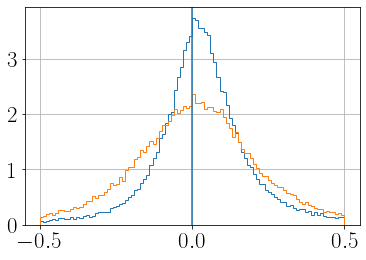

In [243]:
phase0.MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density=True, histtype = 'step')
phase1.MM2_ep.hist(bins = np.linspace(-0.5, 0.5, 101), density=True, histtype = 'step')
plt.axvline(0)

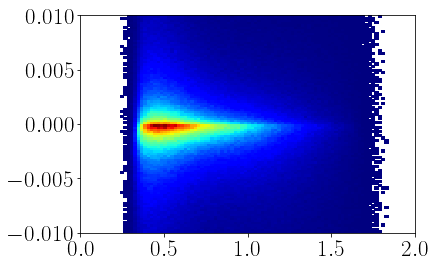

In [26]:
plt.hist2d(phase0.Pp, phase0.MM2_epg, bins = ([np.linspace(0, 2, 101), np.linspace(-0.01, 0.01, 101)]), cmin = 1, cmap = cmap)
plt.show()

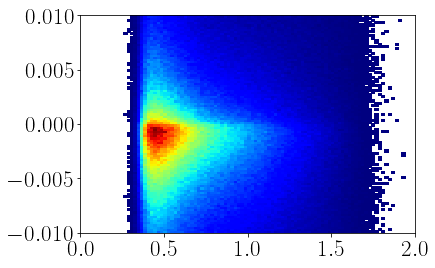

In [27]:
plt.hist2d(phase1.Pp, phase1.MM2_epg, bins = ([np.linspace(0, 2, 101), np.linspace(-0.01, 0.01, 101)]), cmin = 1, cmap = cmap)
plt.show()

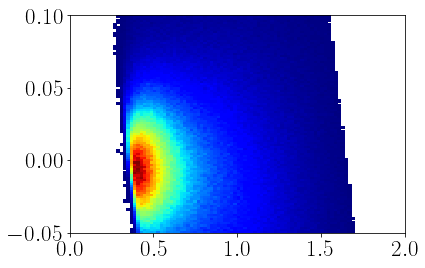

In [22]:
plt.hist2d(phase1.Pp, phase1.GenPp - phase1.Pp, bins = ([np.linspace(0, 2, 101), np.linspace(-0.05, 0.1, 101)]), cmin = 1, cmap = cmap)
plt.show()

<AxesSubplot:>

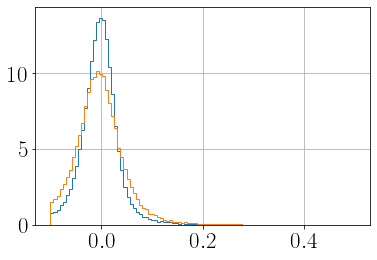

In [189]:
(phase0.GenPp - phase0.Pp).hist(bins = np.linspace(-0.1, 0.5, 101), density=True, histtype = 'step')
(phase1.GenPp - phase1.Pp).hist(bins = np.linspace(-0.1, 0.5, 101), density=True, histtype = 'step')

<AxesSubplot:>

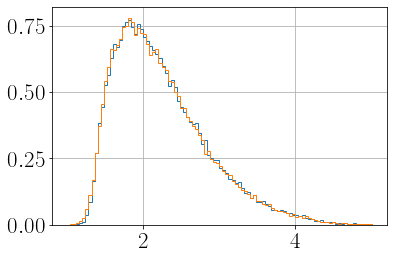

In [237]:
phase0.Q2.hist(bins = np.linspace(1, 5, 101), density=True, histtype = 'step')
phase1.Q2.hist(bins = np.linspace(1, 5, 101), density=True, histtype = 'step')

<AxesSubplot:>

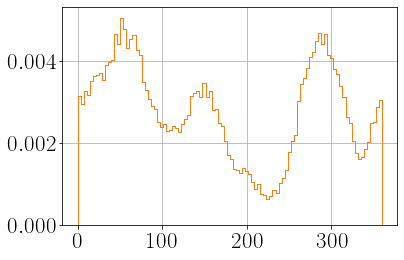

In [190]:
phase0.phi2.hist(bins = np.linspace(0, 360, 101), density=True, histtype = 'step')
phase1.phi2.hist(bins = np.linspace(0, 360, 101), density=True, histtype = 'step')

<AxesSubplot:>

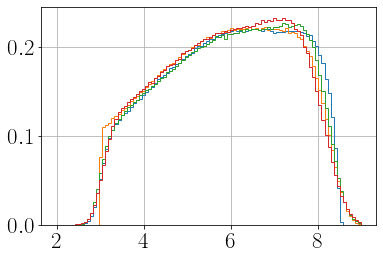

In [19]:
phase0.GenGp.hist(bins = np.linspace(2,9, 101), density = True, histtype = 'step')
phase0.Gp.hist(bins = np.linspace(2, 9, 101), density = True, histtype = 'step')
phase1.Gp.hist(bins = np.linspace(2, 9, 101), density = True, histtype = 'step')
phase2.Gp.hist(bins = np.linspace(2, 9, 101), density = True, histtype = 'step')

In [224]:
phase1.Pe

0        1.185298
1        1.116408
2        1.536137
3        1.033738
4        1.190850
           ...   
59995    1.052255
59996    1.200117
59997    1.043637
59998    1.130993
59999    1.580165
Name: Pe, Length: 60000, dtype: float32

In [4]:
phase0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/train.pkl")
phase1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/project/data/phase1_layer6.pkl")

In [5]:
colName = {str(i):i for i in range (0, 12)}
phase0 = phase0.rename(columns=colName)
phase0.index = range(len(phase0))
phase1.index = range(len(phase1))
phase0 = phase0.loc[:len(phase1)-1, :]
# phase1.loc[:, [0, 1, 2, 3, 8, 9, 10, 11]] = phase0.loc[:, [0, 1, 2, 3, 8, 9, 10, 11]]

In [6]:
def getProton(df, phase=1):
    df.loc[:, "Pp"] = mag([df.loc[:,5], df.loc[:,6], df.loc[:,7]])
    df.loc[:, "Ptheta"] = getTheta([df.loc[:,5], df.loc[:,6], df.loc[:,7]])
    df.loc[:, "Pphi"] = getPhi([df.loc[:,5], df.loc[:,6], df.loc[:,7]])
    df.loc[:, "Ppx"] = df.loc[:,5]
    df.loc[:, "Ppy"] = df.loc[:,6]
    df.loc[:, "Ppz"] = df.loc[:,7]
    df.loc[:, "Pe"] = np.sqrt(df.loc[:, "Pp"]**2 + M**2)

    df.loc[:, "GenPp"] = mag([df.loc[:,"z5"], df.loc[:,"z6"], df.loc[:,"z7"]])
    df.loc[:, "GenPtheta"] = getTheta([df.loc[:,"z5"], df.loc[:,"z6"], df.loc[:,"z7"]])
    df.loc[:, "GenPphi"] = getPhi([df.loc[:,"z5"], df.loc[:,"z6"], df.loc[:,"z7"]])
    df.loc[:, "GenPpx"] = df.loc[:,"z5"]
    df.loc[:, "GenPpy"] = df.loc[:,"z6"]
    df.loc[:, "GenPpz"] = df.loc[:,"z7"]
    df.loc[:, "GenPe"] = df.loc[:,"z4"]    
    return df

def getElectron(df, phase=1):
    df.loc[:, "Ep"] = mag([df.loc[:,1], df.loc[:,2], df.loc[:,3]])
    df.loc[:, "Etheta"] = getTheta([df.loc[:,1], df.loc[:,2], df.loc[:,3]])
    df.loc[:, "Ephi"] = getPhi([df.loc[:,1], df.loc[:,2], df.loc[:,3]])
    df.loc[:, "Epx"] = df.loc[:,1]
    df.loc[:, "Epy"] = df.loc[:, 2]
    df.loc[:, "Epz"] = df.loc[:,3]
    df.loc[:, "Ee"] = np.sqrt(df.loc[:, "Ep"]**2 + me**2)

    df.loc[:, "GenEp"] = mag([df.loc[:,"z1"], df.loc[:,"z2"], df.loc[:,"z3"]])
    df.loc[:, "GenEtheta"] = getTheta([df.loc[:,"z1"], df.loc[:,"z2"], df.loc[:,"z3"]])
    df.loc[:, "GenEphi"] = getPhi([df.loc[:,"z1"], df.loc[:,"z2"], df.loc[:,"z3"]])
    df.loc[:, "GenEpx"] = df.loc[:,"z1"]
    df.loc[:, "GenEpy"] = df.loc[:,"z2"]
    df.loc[:, "GenEpz"] = df.loc[:,"z3"]
    df.loc[:, "GenEe"] = df.loc[:,"z0"]    
    return df

def getPhoton(df, phase=1):
    df.loc[:, "Gp"] = mag([df.loc[:,9], df.loc[:,10], df.loc[:,11]])
    df.loc[:, "Gtheta"] = getTheta([df.loc[:,9], df.loc[:,10], df.loc[:,11]])
    df.loc[:, "Gphi"] = getPhi([df.loc[:,9], df.loc[:,10], df.loc[:,11]])
    df.loc[:, "Gpx"] = df.loc[:,9]
    df.loc[:, "Gpy"] = df.loc[:, 10]
    df.loc[:, "Gpz"] = df.loc[:,11]
    df.loc[:, "Ge"] = df.loc[:,"Gp"]

    df.loc[:, "GenGp"] = mag([df.loc[:,"z9"], df.loc[:,"z10"], df.loc[:,"z11"]])
    df.loc[:, "GenGtheta"] = getTheta([df.loc[:,"z9"], df.loc[:,"z10"], df.loc[:,"z11"]])
    df.loc[:, "GenGphi"] = getPhi([df.loc[:,"z9"], df.loc[:,"z10"], df.loc[:,"z11"]])
    df.loc[:, "GenGpx"] = df.loc[:,"z9"]
    df.loc[:, "GenGpy"] = df.loc[:, "z10"]
    df.loc[:, "GenGpz"] = df.loc[:,"z11"]
    df.loc[:, "GenGe"] = df.loc[:,"z8"]
    return df

def getParticle(df, phase=1):
    df = getProton(df, phase)
    df = getElectron(df, phase)
    df = getPhoton(df, phase)
    return df

In [7]:
def saveDVCSvars(df):
        #set up dvcs variables
        ele = [df['Epx'], df['Epy'], df['Epz']]
        df.loc[:, 'Ep'] = mag(ele)
        df.loc[:, 'Ee'] = getEnergy(ele, me)
        df.loc[:, 'Etheta'] = getTheta(ele)
        df.loc[:, 'Ephi'] = getPhi(ele)

        pro = [df['Ppx'], df['Ppy'], df['Ppz']]

        gam = [df['Gpx'], df['Gpy'], df['Gpz']]
        df.loc[:, 'Gp'] = mag(gam)
        df.loc[:, 'Ge'] = getEnergy(gam, 0)
        df.loc[:, 'Gtheta'] = getTheta(gam)
        df.loc[:, 'Gphi'] = getPhi(gam)

        Ppt = mag([df['Ppx'], df['Ppy'], 0])

        VGS = [-df['Epx'], -df['Epy'], pbeam - df['Epz']]
        v3l = cross(beam, ele)
        v3h = cross(pro, VGS)
        v3g = cross(VGS, gam)
        VmissG = [-df["Epx"] - df["Ppx"], -df["Epy"] - df["Ppy"],
                  pbeam - df["Epz"] - df["Ppz"]]
        VmissP = [-(df["Epx"] + df["Gpx"]), -(df["Epy"] + df["Gpy"]),
                  -(-pbeam + df["Epz"] + df["Gpz"])]
        Vmiss = [-(df["Epx"] + df["Ppx"] + df["Gpx"]), -(df["Epy"] + df["Ppy"] + df["Gpy"]),
                 -(-pbeam + df["Epz"] + df["Ppz"] + df["Gpz"])]
        costheta = cosTheta(VGS, gam)

        df.loc[:, 'Mpx'], df.loc[:, 'Mpy'], df.loc[:, 'Mpz'] = Vmiss

        # binning kinematics
        df.loc[:,'Q2'] = -((ebeam - df['Ee'])**2 - mag2(VGS))
        df.loc[:,'nu'] = (ebeam - df['Ee'])
        df.loc[:,'y'] = df['nu']/ebeam
        df.loc[:,'xB'] = df['Q2'] / 2.0 / M / df['nu']
        df.loc[:,'t1'] = 2 * M * (df['Pe'] - M)
        df.loc[:,'t2'] = (M * df['Q2'] + 2 * M * df['nu'] * (df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta))\
        / (M + df['nu'] - np.sqrt(df['nu'] * df['nu'] + df['Q2']) * costheta)
        df.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df['Ee'])**2 - mag2(VGS)))

        # trento angles
        df.loc[:,'phi1'] = angle(v3l, v3h)
        df.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                                  df['phi1'], df['phi1'])
        df.loc[:,'phi2'] = angle(v3l, v3g)
        df.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                                  0, 360.0 - df['phi2'], df['phi2'])

        # exclusivity variables
        df.loc[:,'MM2_epg'] = (-M - ebeam + df["Ee"] +
                             df["Pe"] + df["Ge"])**2 - mag2(Vmiss)
        df.loc[:,'ME_epg'] = (M + ebeam - df["Ee"] - df["Pe"] - df["Ge"])
        df.loc[:,'MM2_ep'] = (-M - ebeam + df["Ee"] + df["Pe"])**2 - mag2(VmissG)
        df.loc[:,'MM2_eg'] = (-M - ebeam + df["Ee"] + df["Ge"])**2 - mag2(VmissP)
        df.loc[:,'MPt'] = np.sqrt((df["Epx"] + df["Ppx"] + df["Gpx"])**2 +
                                (df["Epy"] + df["Ppy"] + df["Gpy"])**2)
        df.loc[:,'coneAngle'] = angle(ele, gam)
        df.loc[:,'reconGam'] = angle(gam, VmissG)
        df.loc[:,'coplanarity'] = angle(v3h, v3g)
        return df

In [8]:
phase0 = getParticle(phase0)
phase1 = getParticle(phase1)

In [9]:
phase0 = saveDVCSvars(phase0)
phase1 = saveDVCSvars(phase1)

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


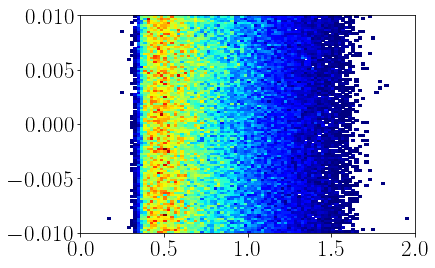

In [10]:
plt.hist2d(phase1.Pp, phase1.MM2_ep, bins = ([np.linspace(0, 2, 101), np.linspace(-0.01, 0.01, 101)]), cmin = 1, cmap = cmap)
plt.show()

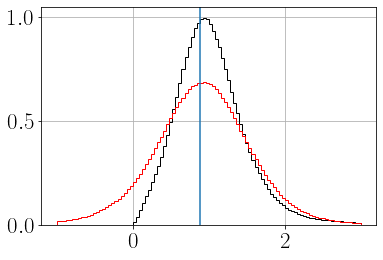

In [11]:
phase0.MM2_eg.hist(bins = np.linspace(-1, 3, 101), density=True, histtype = 'step', color='k')
phase1.MM2_eg.hist(bins = np.linspace(-1, 3, 101), density=True, histtype = 'step', color='r')
# phase2.MM2_eg.hist(bins = np.linspace(-1, 3, 101), density=True, histtype = 'step')
plt.axvline(0.938272**2)

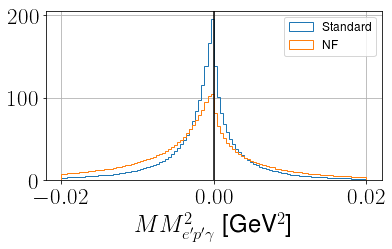

In [12]:
phase0.MM2_epg.hist(bins = np.linspace(-0.02, 0.02, 101), density=True, histtype = 'step', label="Standard")
phase1.MM2_epg.hist(bins = np.linspace(-0.02, 0.02, 101), density=True, histtype = 'step', label="NF")
# phase2.MM2_epg.hist(bins = np.linspace(-0.01, 0.01, 101), density=True, histtype = 'step', label="NF on NF")
plt.legend(loc = "upper right")
plt.xlabel(r"$MM^2_{e'p'\gamma}$" + " ["+GeV2+"]")
plt.axvline(0, color ='k')
plt.tight_layout()
# plt.savefig("MM2_epg.pdf")

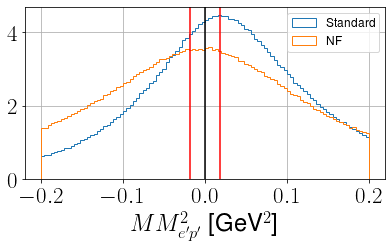

In [13]:
phase0.MM2_ep.hist(bins = np.linspace(-0.2, 0.2, 101), density=True, histtype = 'step', label="Standard")
phase1.MM2_ep.hist(bins = np.linspace(-0.2, 0.2, 101), density=True, histtype = 'step', label="NF")
# phase2.MM2_ep.hist(bins = np.linspace(-0.2, 0.2, 101), density=True, histtype = 'step', label="NF on NF")
plt.legend(loc = "upper right")
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeV2+"]")
plt.axvline(0, color ='k')
plt.axvline(0.135**2, color='r')
plt.axvline(-0.135**2, color='r')
plt.tight_layout()
# plt.savefig("MM2_ep.pdf")

<AxesSubplot:>

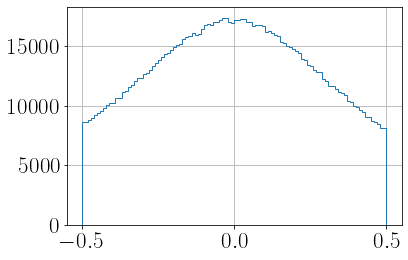

In [28]:
# (phase0.Gpz - phase0.GenGpz).hist(bins = np.linspace(-0.5, 0.5, 101), histtype = 'step')
(phase1.Pphi - phase1.GenPphi).hist(bins = np.linspace(-0.5, 0.5, 101), histtype = 'step')

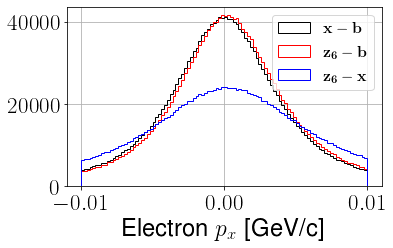

In [18]:
(phase0.GenEpx - phase0.Epx).hist(bins = np.linspace(-0.01, 0.01, 101), histtype = 'step', color ='k', label = r'$\mathbf{x}-\mathbf{b}$')
(phase1.Epx - phase0.Epx).hist(bins = np.linspace(-0.01, 0.01, 101), histtype = 'step', color = 'r', label = r'$\mathbf{z_6}-\mathbf{b}$')
(phase1.Epx - phase1.GenEpx).hist(bins = np.linspace(-0.01, 0.01, 101), histtype = 'step', color ='b', label = r'$\mathbf{z_6} - \mathbf{x}$')
plt.legend(loc = "upper right", fontsize = 16)
plt.xlabel("Electron "+r"$p_x$" +" [" +GeVc+"]")
plt.tight_layout()
plt.savefig("elec_px.pdf")

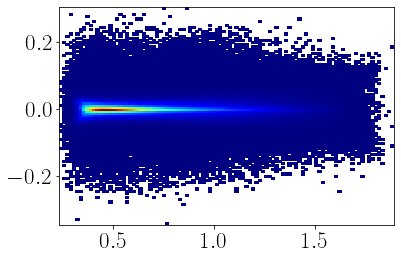

In [33]:
plt.hist2d(phase0.Pp, phase0.Ppy - phase0.GenPpy, bins = 101, cmin = 1, cmap = cmap)
plt.show()

<AxesSubplot:>

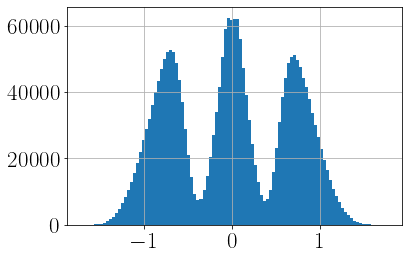

In [45]:
phase1.Gpy.hist(bins = 101)

<AxesSubplot:>

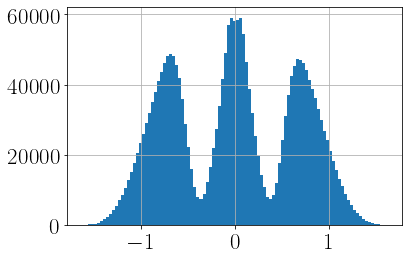

In [46]:
phase0.Gpy.hist(bins = 101)

In [14]:
phase0.index = range(len(phase0))
phase1.index = range(len(phase1))
phase0 = phase0.loc[:len(phase1)-1, :]

In [15]:
phase0.GenGpy - phase1.GenGpy

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2287995    0.0
2287996    0.0
2287997    0.0
2287998    0.0
2287999    0.0
Name: GenGpy, Length: 2288000, dtype: float64